![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
import pandas as pd

%matplotlib inline
df = pd.read_csv('/Users/hieu/Desktop/hillDSIAGit/DSIA-SYD-FT-Projects-201907/hieu/LinearRegressionHomework/breast-cancer-wisconsin-data.csv')

In [ ]:
df.columns

### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [ ]:
df = df.drop(['id', 'radius_mean', 'perimeter_mean',
       'area_mean',  'compactness_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
       'compactness_se', 'concave points_se', 'radius_worst', 
       'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'Unnamed: 32'], axis=1)

# df = df.drop(['texture_mean','smoothness_mean',  'symmetry_mean', 
#         'smoothness_se', 'symmetry_se','fractal_dimension_se', 'texture_worst',
#      'smoothness_worst', 'fractal_dimension_worst', 'Unnamed: 32'], axis=1)

df.head(1)

In [9]:
df.shape

(569, 20)

In [3]:
# df = df.drop(['id', 'radius_mean', 'perimeter_mean',
#        'area_mean',  'compactness_mean', 'concavity_mean',
#        'concave points_mean', 
#        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
#        'compactness_se', 'concave points_se', 'radius_worst', 
#        'perimeter_worst', 'area_worst',
#        'compactness_worst', 'concavity_worst', 'concave points_worst',
#        'symmetry_worst', 'Unnamed: 32'], axis=1)

df = df.drop(['id','texture_mean','smoothness_mean',  'symmetry_mean', 
        'smoothness_se', 'symmetry_se','fractal_dimension_se','fractal_dimension_mean', 'texture_worst', 'texture_se',
     'smoothness_worst', 'fractal_dimension_worst', 'Unnamed: 32'], axis=1)

df.head(1)

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,17.99,122.8,1001.0,0.2776,0.3001,0.1471,1.095,8.589,153.4,0.04904,0.05373,0.01587,25.38,184.6,2019.0,0.6656,0.7119,0.2654,0.4601


In [8]:
# df.describe()

In [2]:
df['diagnosis'].replace(['M','B'], [1,0],inplace = True)

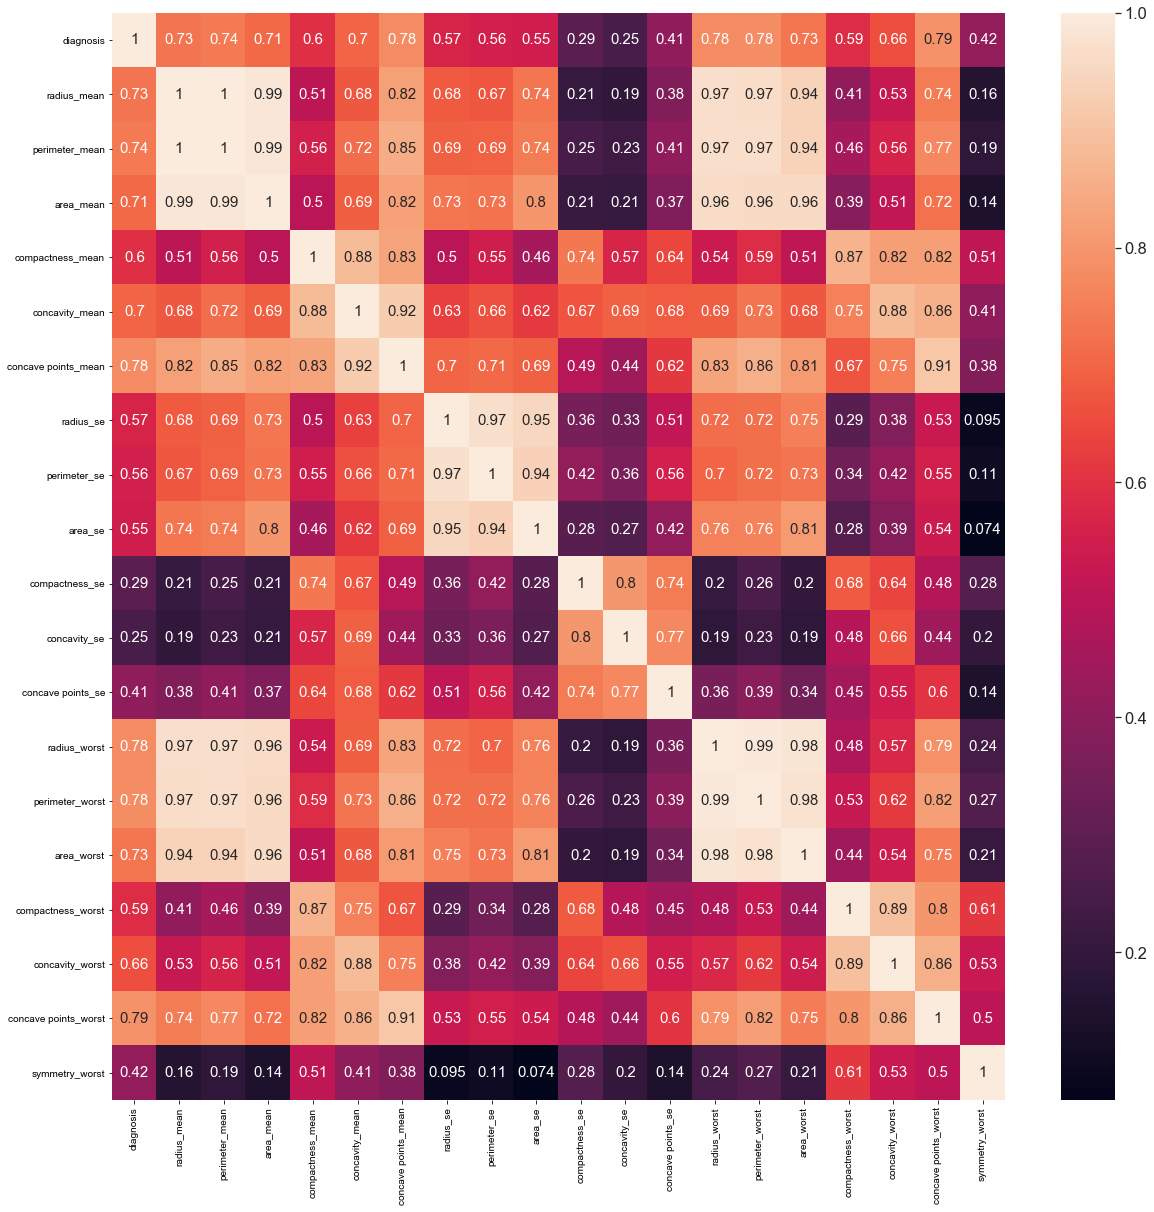

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize = (20,20))
sns.set(font_scale=1.5)
# sns.heatmap(input_data.corr(),square=True,cbar=True,annot=True,annot_kws={'size':11.5}) Same Without square=,cbar=,
sns.heatmap(df.corr(),annot=True,annot_kws={'size': 15})
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize = (11,11))
sns.set(font_scale=1.5)
# sns.heatmap(input_data.corr(),square=True,cbar=True,annot=True,annot_kws={'size':11.5}) Same Without square=,cbar=,
sns.heatmap(df.corr(),annot=True,annot_kws={'size': 15})
plt.show()

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [89]:
from sklearn.linear_model import LogisticRegression,Ridge,PassiveAggressiveRegressor,RidgeCV
from sklearn.datasets import make_regression,load_diabetes,load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import numpy as np
y = LabelEncoder().fit_transform(df['diagnosis'])
y.shape

(569,)

In [108]:
X =df.drop(['diagnosis'], axis=1)

In [109]:
X.shape()

TypeError: 'tuple' object is not callable

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test= train_test_split(df,test_size=.2,random_state=42) #,random_state=42
My_model = LogisticRegression()
My_model.fit(X_train,y_train)
X_test['concave points_se'].head()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


204    0.01037
70     0.01370
131    0.01093
431    0.01167
540    0.01494
Name: concave points_se, dtype: float64

In [98]:
y_pred = My_model.predict(X_test)
pd.DataFrame(y_pred).iloc[0:20,:].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,1


In [99]:
from sklearn.metrics import accuracy_score
# accuracy_score(y_true, y_pred)
accuracy_score(y_test, y_pred)

1.0

In [106]:
y.shape()

TypeError: 'tuple' object is not callable

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [101]:
y = LabelEncoder().fit_transform(df['diagnosis'])

In [102]:
###Start SVM
import matplotlib.pyplot as plt
from sklearn import svm

In [103]:
###SVM Step 4
My_model = svm.SVC(kernel='linear', C=1, gamma=1)
# svc = svm.SVC(kernel='linear', C=1, gamma=1)

In [110]:
###SVM Step 5
My_model.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
###SVM Step 7
My_model.score(X,y)

0.9560632688927944

In [113]:
###SVM Step 6
# predicted = My_model.predict(X_test)
print(X.shape, y.shape)

(569, 19) (569,)


ValueError: X.shape[1] = 2 should be equal to 19, the number of features at training time

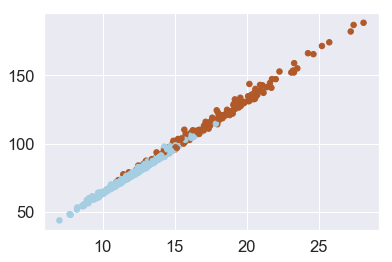

In [124]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

# # plot the decision function
# ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# # create grid to evaluate model
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = My_model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
# plot support vectors
ax.scatter(My_model.support_vectors_[:, 0], My_model.support_vectors_[:, 1], s = 100, linewidth = 1, facecolors = 'none')
plt.show()

### 4. Naive Bayes
#### 4.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [19]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [20]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

No handles with labels found to put in legend.


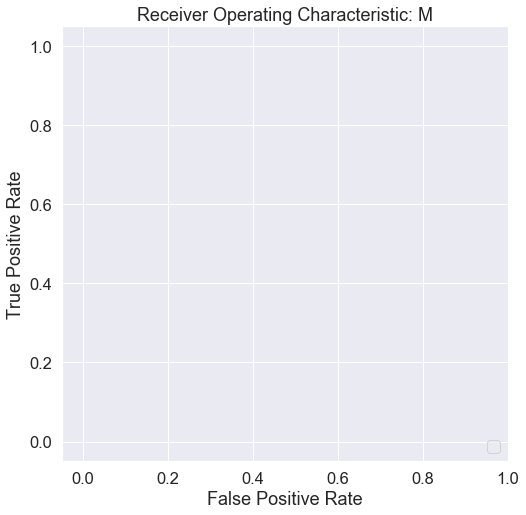

In [21]:
plt.figure(figsize=[8,8])
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 6. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)

**© 2019 Data Science Institute of Australia**